# 🧾 Banknote Authentication: Clustering Analysis with K-Means

# 📌 Objective:
# Explore and cluster the Banknote Authentication dataset using K-Means to determine
# whether we can distinguish between genuine and forged banknotes without using labels.



In [1]:
# 🛠️ Step 1: Import Libraries and Load Dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


Matplotlib is building the font cache; this may take a moment.


In [2]:
# Load the dataset
df = pd.read_csv("Banknote-authentication-dataset.csv")  # Update filename if needed
print(df.head())
print("\nColumns:", df.columns.tolist())



        V1      V2
0  3.62160  8.6661
1  4.54590  8.1674
2  3.86600 -2.6383
3  3.45660  9.5228
4  0.32924 -4.4552

Columns: ['V1', 'V2']


In [3]:
# 📈 Step 2: Basic Statistical Analysis

subset = df[["V1", "V2"]]  # Choose features for initial analysis
data = subset.values

# Calculate mean and standard deviation
means = np.mean(data[:, [0, 1]], axis=0)
stds = np.std(data[:, [0, 1]], axis=0, ddof=1)

print("\nMean of V1:", means[0])
print("Mean of V2:", means[1])
print("Std Dev of V1:", stds[0])
print("Std Dev of V2:", stds[1])




Mean of V1: 0.43373525728862977
Mean of V2: 1.9223531209912539
Std Dev of V1: 2.8427625862451658
Std Dev of V2: 5.869046743580378


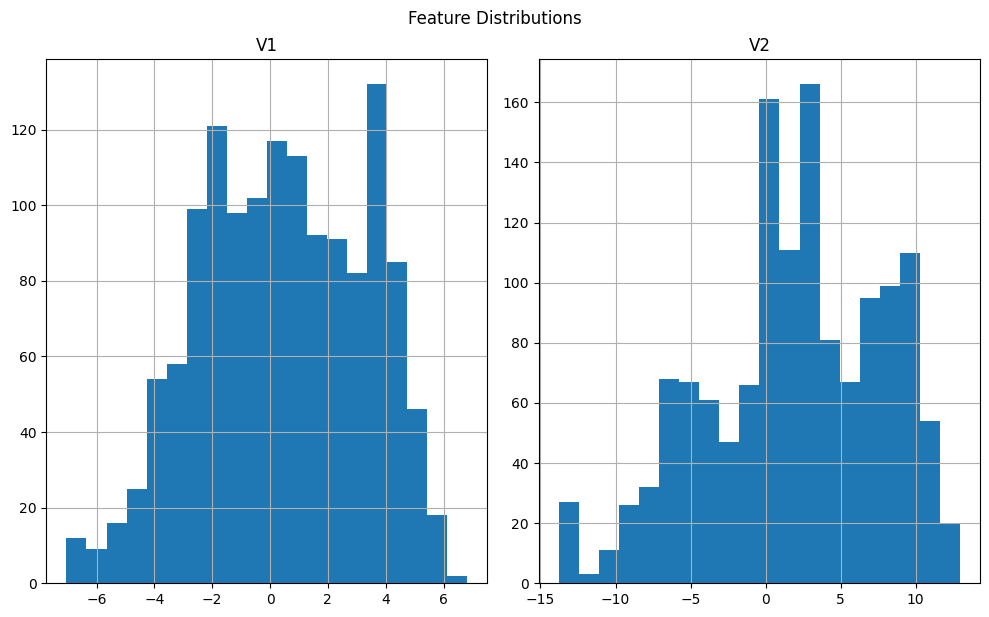

In [4]:
# 📊 Step 3: Data Visualization Before Scaling

# Histograms
df.hist(bins=20, figsize=(10, 6))
plt.tight_layout()
plt.suptitle("Feature Distributions", y=1.02)
plt.show()



In [5]:
# 🔄 Step 4: Standardize the Dataset

# Drop label column if present
X = df.drop(columns=["class"]) if "class" in df.columns else df.copy()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)



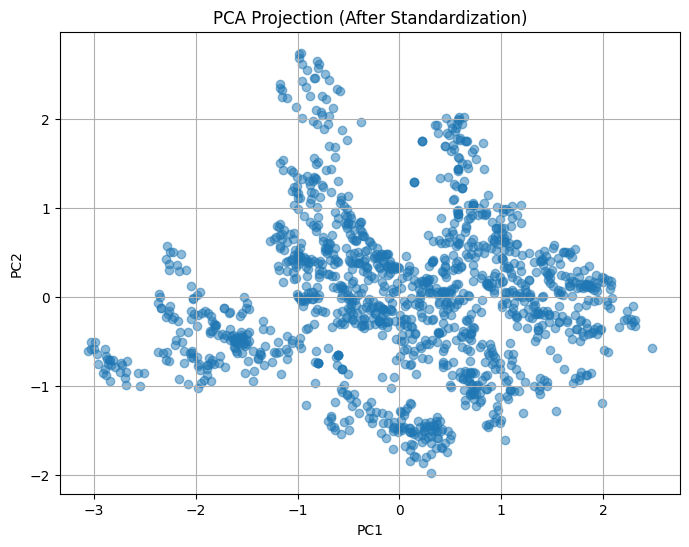

In [6]:
# 🔻 Step 5: PCA Projection for Visualization

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title("PCA Projection (After Standardization)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()



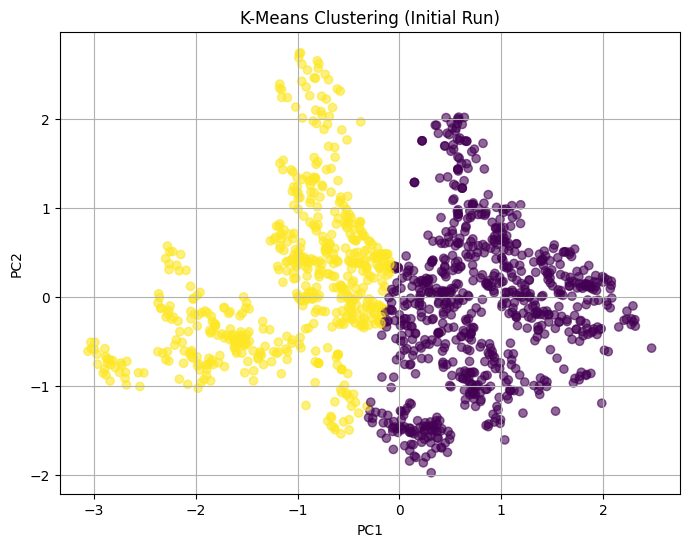

In [7]:
# 🧠 Step 6: Apply K-Means Clustering (Initial Run)

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title("K-Means Clustering (Initial Run)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


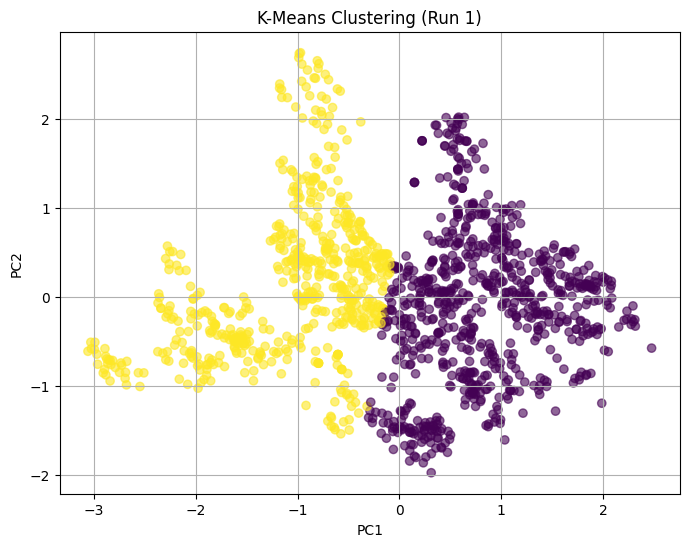

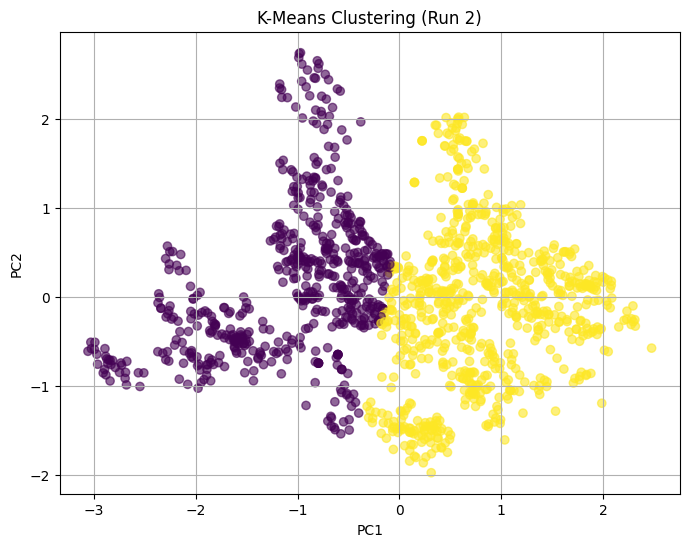

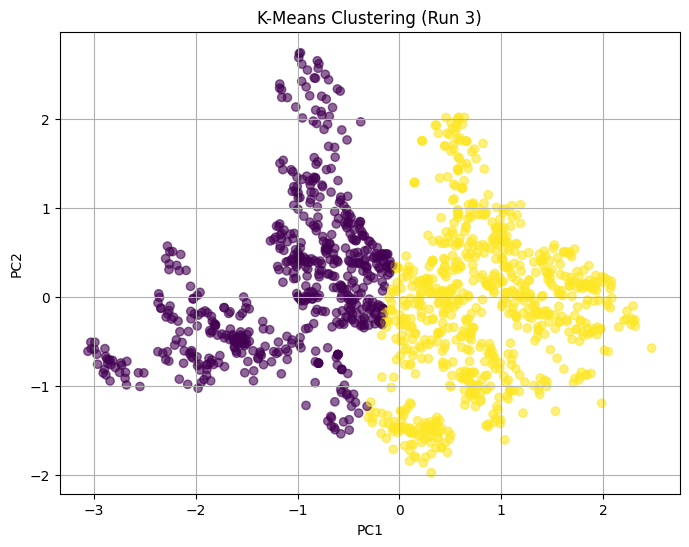

In [8]:
# 🔁 Step 7: Re-run K-Means Multiple Times to Check Stability

for i in range(3):
    km = KMeans(n_clusters=2, random_state=None)
    c = km.fit_predict(scaled_data)

    plt.figure(figsize=(8, 6))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=c, cmap='viridis', alpha=0.6)
    plt.title(f"K-Means Clustering (Run {i + 1})")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(True)
    plt.show()



# 📝 Step 8: Summary & Insights

# The dataset has continuous numerical features that vary in scale and spread.
# Standardization brought all features to a common scale, ensuring fair clustering.
# PCA helped reduce dimensions while retaining structure.
# K-Means consistently formed meaningful clusters across multiple runs,
# suggesting that the data has real groupings and the algorithm is fairly stable.


